In [1]:
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

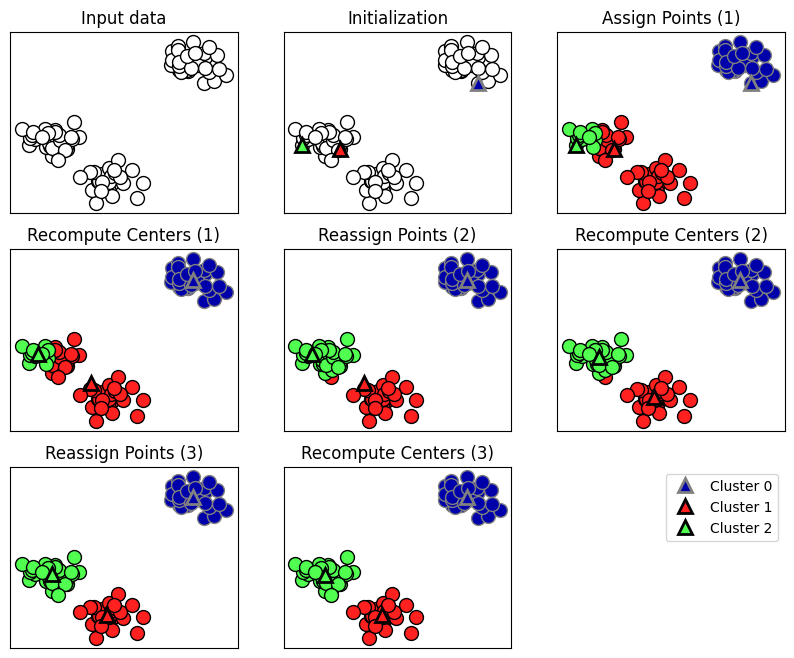

In [2]:
mglearn.plots.plot_kmeans_algorithm()

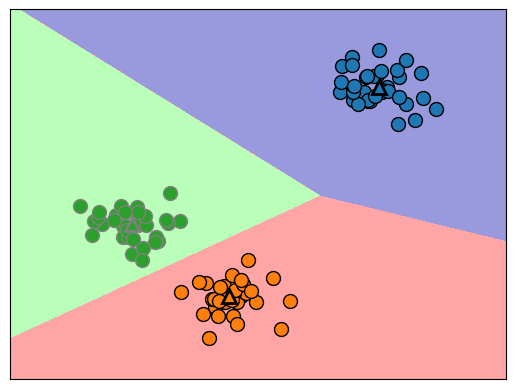

In [3]:
mglearn.plots.plot_kmeans_boundaries()

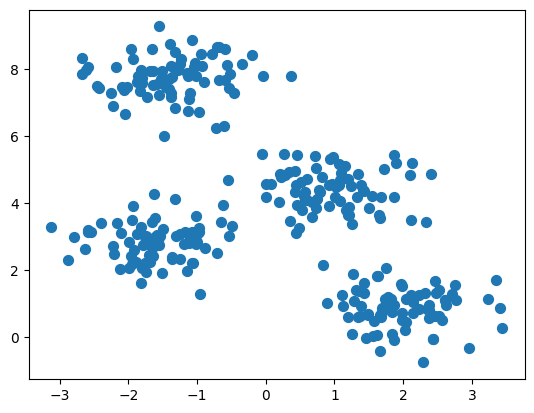

In [4]:
from sklearn.datasets._samples_generator import make_blobs
X,y = make_blobs(n_samples=300,centers=4,cluster_std=0.6,random_state=0)
plt.scatter(X[:,0],X[:,1],s=50)

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [6]:
y_kmeans = kmeans.predict(X)

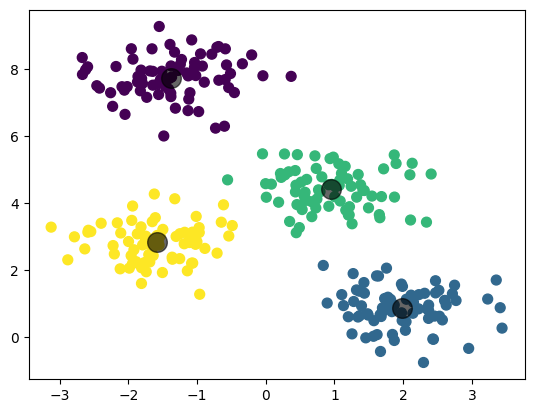

In [9]:
plt.scatter(X[:,0],X[:,1],s=50,c=y_kmeans,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.6)

## SpectralCluster Algorithms

* KMeans algoritması, sınırları lineer olan veriler için uygundur.

In [10]:
from sklearn.datasets import make_moons
X,y = make_moons(200,noise=.05,random_state=0)

In [13]:
labels = KMeans(2,random_state=0).fit_predict(X)

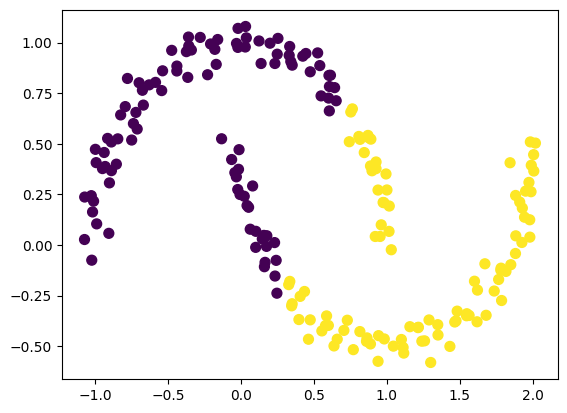

In [14]:
plt.scatter(X[:,0],X[:,1],s=50,c=labels,cmap='viridis')

* Yukarıda göründüğü gibi lineer sınırları olamayn verilerde KMeans algoritması düzgün kümeleme yapamaz.
### Bunun için başka bir cluster algoritması (SpectralCluster) kullanıcaz.

In [15]:
from sklearn.cluster import SpectralClustering

/home/cemal/MachineLearningNotes/.venv/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


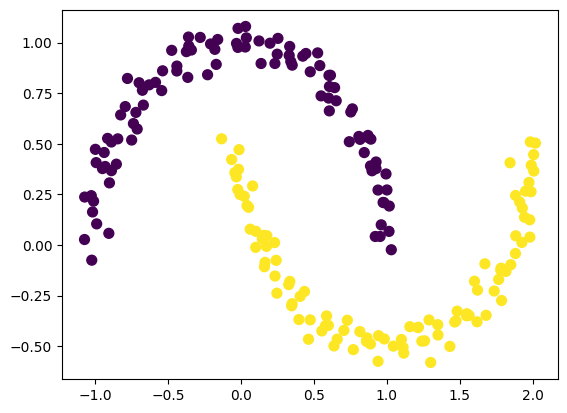

In [16]:
model = SpectralClustering(n_clusters=2,affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:,0],X[:,1],s=50,c=labels,cmap='viridis')

## MiniBatch Algorithms
* Hesaplama zamanını azaltmak için kullanılır.
* Her adımda veri kümesi güncellenirken, verinin bir alt kümesi kullanılır.

In [17]:
from sklearn.datasets import load_sample_image
china = load_sample_image('china.jpg')

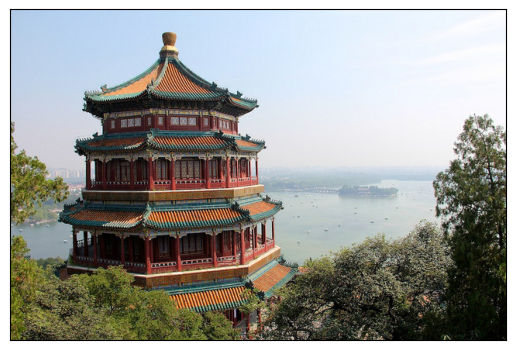

In [18]:
ax = plt.axes(xticks=[],yticks=[])
ax.imshow(china)

In [20]:
china.shape

(427, 640, 3)

In [21]:
data = china/255
data = data.reshape(427*640,3)
data.shape

(273280, 3)

In [25]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)

MiniBatchKMeans(n_clusters=16)

Text(0.5, 1.0, '16-color Image')

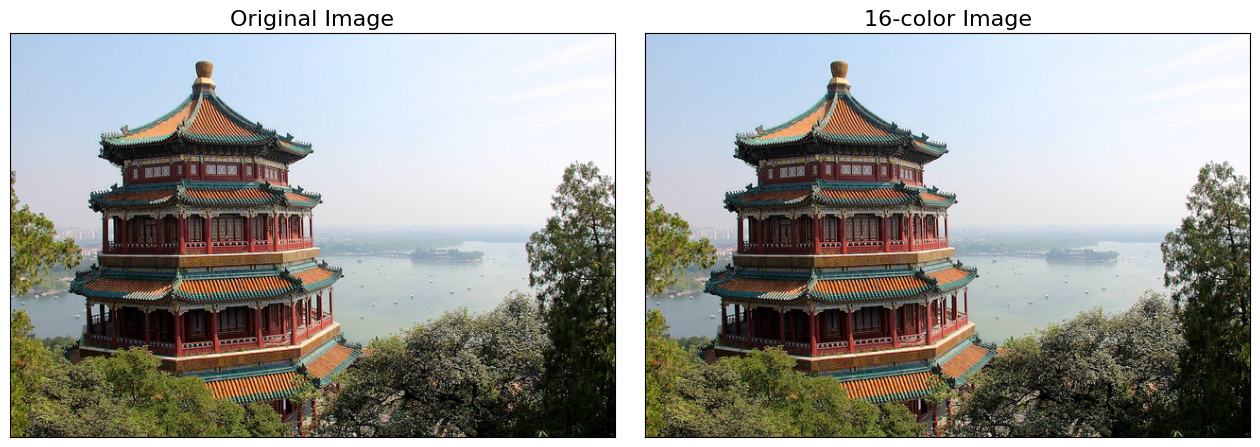

In [56]:
new_data = kmeans.predict(data)
new_data.shape
import numpy as np
new_data = np.array([data])
new_data.resize(427,640,3)

#resmi açan kod
fig, ax = plt.subplots(1, 2, figsize=(16, 6),subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(new_data)
ax[1].set_title('16-color Image', size=16)

* Yukarıda görünmüyor olabilir ama resimdeki en baskın 16 rengi ortaya çıkardık